In [1]:
Y=[]

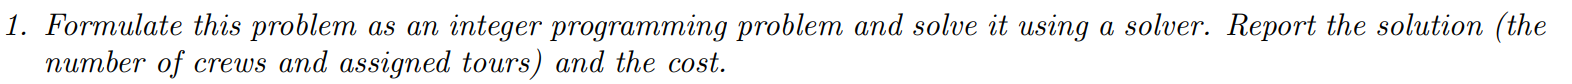

The indicator function $\text{indicator}_{S_j}(i)$ equals 1 if flight $i$ is covered by crew $j$'s sequence of flights, and 0 otherwise.

**Objective Function:**
\begin{equation*}
\text{Minimize} \quad \sum_{j=1}^{9} c_j \cdot y_j
\end{equation*}

**Constraints:**
\begin{align*}
\text{Ensure that all flights are covered:} \\
& \sum_{j=1}^{9} y_j \cdot \text{indicator}_{S_j}(i) \geq 1 \quad \text{for all flights } i \in \{1,2,3,...,14\}\\
\text{Binary constraints on decision variables:} \\
& y_j \in \{0, 1\} \quad \text{for all } j \in \{1,2,3,...,9\}
\end{align*}


In [2]:
!pip install pulp

In [3]:
from pulp import *
import time

# Define the flights and crews data
flights = [
    [1, 0, 0, 1, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 1, 0, 1, 0]
]

# Define the cost coefficients for each crew
costs = [45, 45, 45, 45, 35, 55, 55, 60, 60]

# Create a new PuLP problem
prob = LpProblem("Crew_Assignment", LpMinimize)

# Define decision variables
num_crews = len(costs)
y = [LpVariable(f"y_{j}", cat=LpBinary) for j in range(num_crews)]

# Define objective function
prob += lpSum([costs[j] * y[j] for j in range(num_crews)])

# Define constraints
num_flights = len(flights)
for i in range(num_flights):
    prob += lpSum([flights[i][j] * y[j] for j in range(num_crews)]) >= 1

# Measure the start time
start_time = time.time()

# Solve the problem using the default solver
prob.solve()

# Measure the end time
end_time = time.time()

# Print the time taken
print("Time taken:", end_time - start_time, "seconds")
Y.append(end_time - start_time)

number_of_crews = 0
# Print the optimal crew assignments
for j in range(num_crews):
    print(f"Crew {j+1}: {value(y[j])}")
    number_of_crews += value(y[j])
# Print the optimal total cost
print("Optimal total cost:", value(prob.objective)*1000)
print("number of crews",number_of_crews)

Time taken: 0.024876832962036133 seconds
Crew 1: 0.0
Crew 2: 1.0
Crew 3: 1.0
Crew 4: 0.0
Crew 5: 1.0
Crew 6: 1.0
Crew 7: 0.0
Crew 8: 0.0
Crew 9: 0.0
Optimal total cost: 180000.0
number of crews 4.0


In [4]:
print('assigned tours:','B,C,E,F')

assigned tours: B,C,E,F


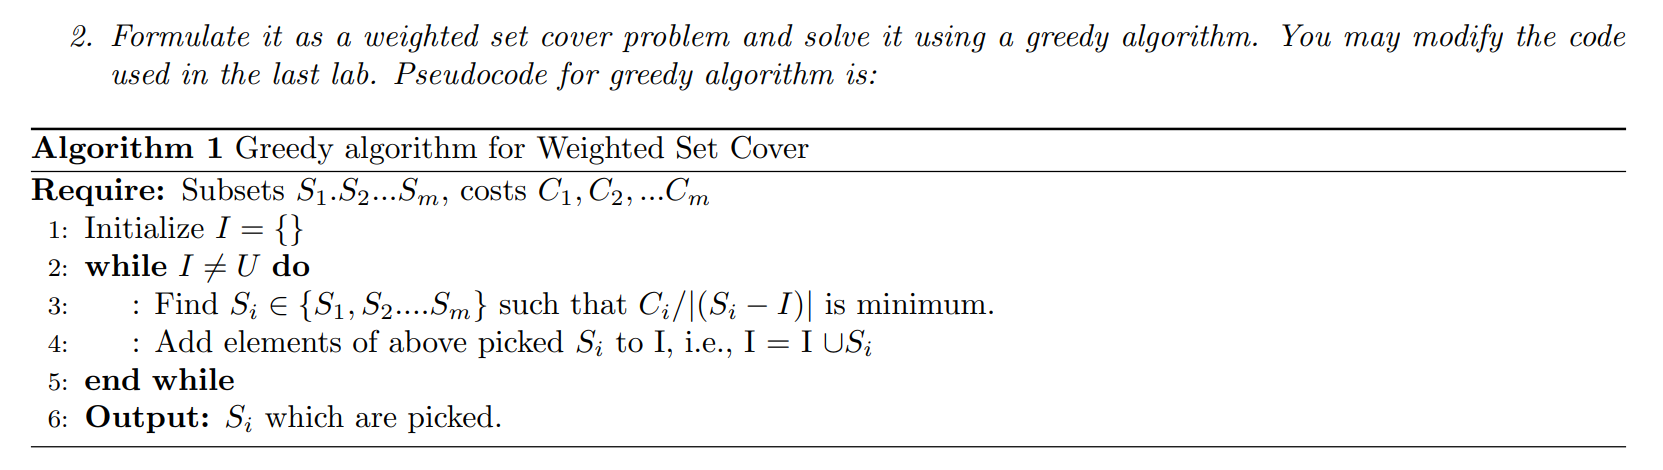

In [5]:
def greedy_weighted_set_cover(subsets, costs):
    universe = set().union(*subsets)  # Union of all subsets to get the universe
    covered = set()  # Elements covered so far
    selected_subsets = []  # Selected subsets

    while covered != universe:
        min_cost_per_element = float('inf')
        selected_subset = None

        for subset, cost in zip(subsets, costs):
            if subset <= covered:
                continue  # Skip subsets already covered

            uncovered_elements = subset - covered
            if not uncovered_elements:
                continue  # Skip if the subset doesn't cover any new element

            cost_per_element = cost / len(uncovered_elements)

            if cost_per_element < min_cost_per_element:
                min_cost_per_element = cost_per_element
                selected_subset = subset

        selected_subsets.append(selected_subset)
        covered.update(selected_subset)

    return selected_subsets


subsets = [{1, 4, 8,10}, {2, 5, 9,12}, {3, 6,7, 9}, {1, 9, 11,14},{1,11,13},{2,4,8,10,14},{3,6,7,11,13},{2,4,8,10,14},{3,4,5,11,12}]
costs = [45,45,45,45,35,55,55,60,60]

# Measure the start time
start_time = time.time()

selected = greedy_weighted_set_cover(subsets, costs)

# Measure the end time
end_time = time.time()

# Print the time taken
print("Time taken:", end_time - start_time, "seconds")
Y.append(end_time - start_time)

print("Selected Subsets:", selected)

Time taken: 0.0027320384979248047 seconds
Selected Subsets: [{2, 4, 8, 10, 14}, {3, 6, 7, 11, 13}, {9, 2, 12, 5}, {1, 11, 13}]


In [6]:
print("number of crews:",len(selected))
print("cost:",(55+55+45+35)*1000 )
print('assigned tours:','F,G,B,E')

number of crews: 4
cost: 190000
assigned tours: F,G,B,E


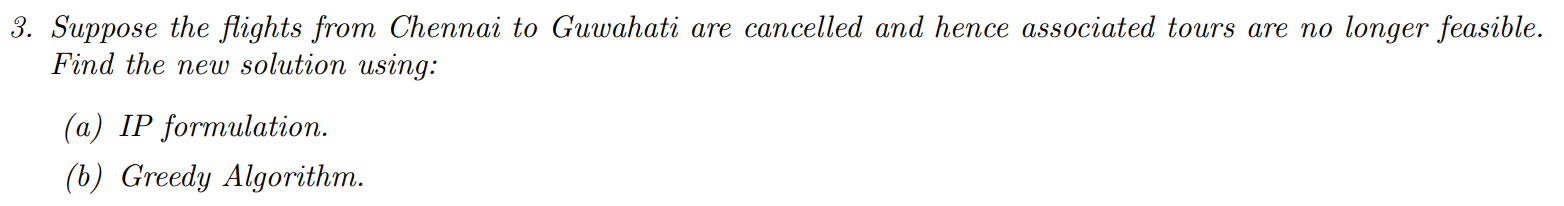

The indicator function $\text{indicator}_{S_j}(i)$ equals 1 if flight $i$ is covered by crew $j$'s sequence of flights, and 0 otherwise.

**Objective Function:**
\begin{equation*}
\text{Minimize} \quad \sum_{j=1}^{9} c_j \cdot y_j \quad    j \in \{1,2,3,6,8\}
\end{equation*}

**Constraints:**
\begin{align*}
\text{Ensure that all flights are covered:} \\
& \sum_{j=1}^{9} y_j \cdot \text{indicator}_{S_j}(i) \geq 1 \quad \text{for all flights } i \in \{1,2,3,...,14\}\\
\text{Binary constraints on decision variables:} \\
& y_j \in \{0, 1\} \quad \text{for all } j \in \{1,2,3,6,8\}
\end{align*}


(a)

In [7]:
from pulp import *
import time
subsets = [{1, 4, 8,10}, {2, 5, 9,12}, {3, 6,7, 9} ,{2,4,8,10,14},{2,4,8,10,14}]

# Define the flights and crews data
flights = [
    [1,0,0,0,0],
    [0, 1, 0, 1, 1],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 1,  1],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 0, 0],
    [1, 0, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 1]
]

# Define the cost coefficients for each crew
costs = [45, 45, 45, 55, 60]

# Create a new PuLP problem
prob2 = LpProblem("Crew_Assignment", LpMinimize)

# Define decision variables
num_crews = len(costs)
y = [LpVariable(f"y_{j}", cat=LpBinary) for j in range(num_crews)]

# Define objective function
prob2 += lpSum([costs[j] * y[j] for j in range(num_crews)])

# Define constraints

num_flights = len(flights)
for i in range(num_flights):
    prob2 += lpSum([flights[i][j] * y[j] for j in range(num_crews)]) >= 1

# Measure the start time
start_time = time.time()

# Solve the problem using the default solver
prob2.solve()

# Measure the end time
end_time = time.time()

# Print the time taken
print("Time taken:", end_time - start_time, "seconds")
Y.append(end_time - start_time)

number_of_crews = 0
# Print the optimal crew assignments
for j in range(num_crews):
    print(f"Crew {j+1}: {value(y[j])}")
    number_of_crews += value(y[j])

# Print the optimal total cost
print("Optimal total cost:", value(prob2.objective)*1000)
print("number of crews",number_of_crews)

Time taken: 0.011343717575073242 seconds
Crew 1: 1.0
Crew 2: 1.0
Crew 3: 1.0
Crew 4: 1.0
Crew 5: 0.0
Optimal total cost: 190000.0
number of crews 4.0


In [8]:
print('assigned tours:','A,B,C,F')

assigned tours: A,B,C,F


(b)

In [9]:
subsets = [{1, 4, 8,10}, {2, 5, 9,12}, {3, 6,7, 9} ,{2,4,8,10,14},{2,4,8,10,14}]
costs = [45,45,45,55,60]


# Measure the start time
start_time = time.time()

selected = greedy_weighted_set_cover(subsets, costs)

# Measure the end time
end_time = time.time()

# Print the time taken
print("Time taken:", end_time - start_time, "seconds")
Y.append(end_time - start_time)

print("Selected Subsets:", selected)

Time taken: 0.00011897087097167969 seconds
Selected Subsets: [{2, 4, 8, 10, 14}, {9, 3, 6, 7}, {9, 2, 12, 5}, {8, 1, 10, 4}]


In [10]:
print("number of crews:",len(selected))
print("cost:",(55+45+45+45)*1000 )
print('assigned tours:','F,C,B,A')

number of crews: 4
cost: 190000
assigned tours: F,C,B,A


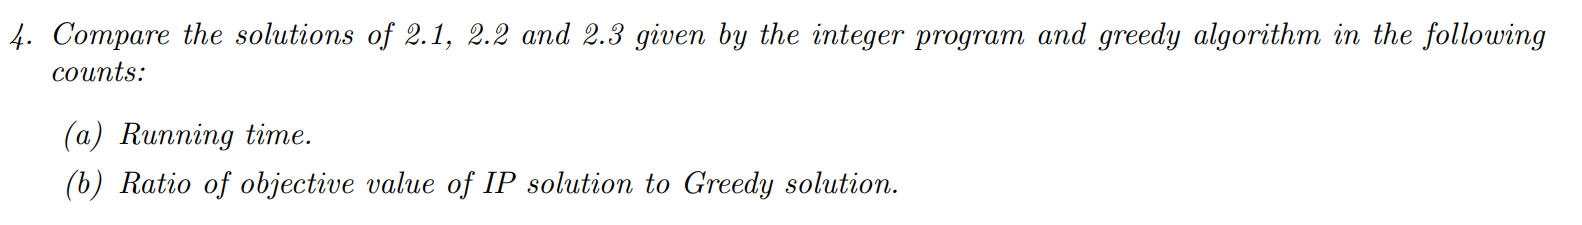

(a)

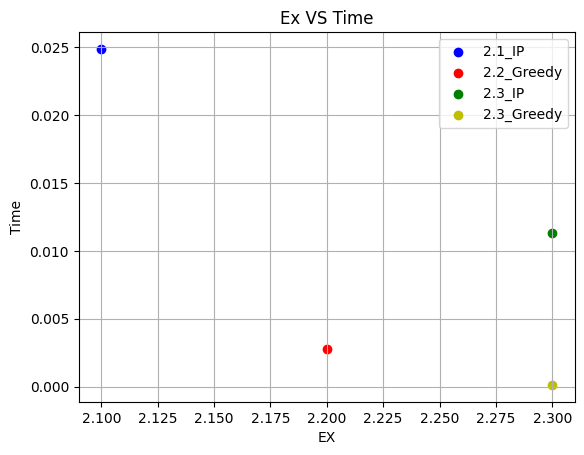

In [11]:
import matplotlib.pyplot as plt

X = [2.1, 2.2, 2.3, 2.3]

# Set colors for each point
colors = ['b', 'r', 'g', 'y']
labels = ['2.1_IP', '2.2_Greedy', '2.3_IP', '2.3_Greedy']

# Plot scatter points with labels
for x, y, color, label in zip(X, Y, colors, labels):
    plt.scatter(x, y, marker='o', color=color, label=label)

plt.xlabel("EX")
plt.ylabel("Time")
plt.title("Ex VS Time")
plt.grid(True)
plt.legend()  # Display legend
plt.show()


(b) Ratio of objective value of IP solution to Greedy solution

In [14]:
print('2.1/2.2:',value(prob.objective)/(55+55+45+35))

2.1/2.2: 0.9473684210526315


In [15]:
print('2.3(a)/2.3(b):',value(prob2.objective)/(55+45+45+45))

2.3(a)/2.3(b): 1.0
